In [367]:
import pandas as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats as stats

# Load the data and extract the relevant columns

In [368]:
# reading csv file  
dfSurvey = pd.read_csv("responses.csv",usecols=["Finances", "Gender", "Village - town", "Healthy eating"])
dfSurvey.head()

,Healthy eating,Finances,Gender,Village - town
0,4.0,3.0,female,village
1,3.0,3.0,female,city
2,3.0,2.0,female,city
3,3.0,2.0,female,city
4,4.0,4.0,female,village


# Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.

Missing values in dataframe
 Healthy eating    3
Finances          3
Gender            6
Village - town    4
dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Encoded values 
    Healthy eating  Finances  Gender  Village - town
0             4.0       3.0       0               0
1             3.0       3.0       0               1
2             3.0       2.0       0               1
3             3.0       2.0       0               1
4             4.0       4.0       0               0


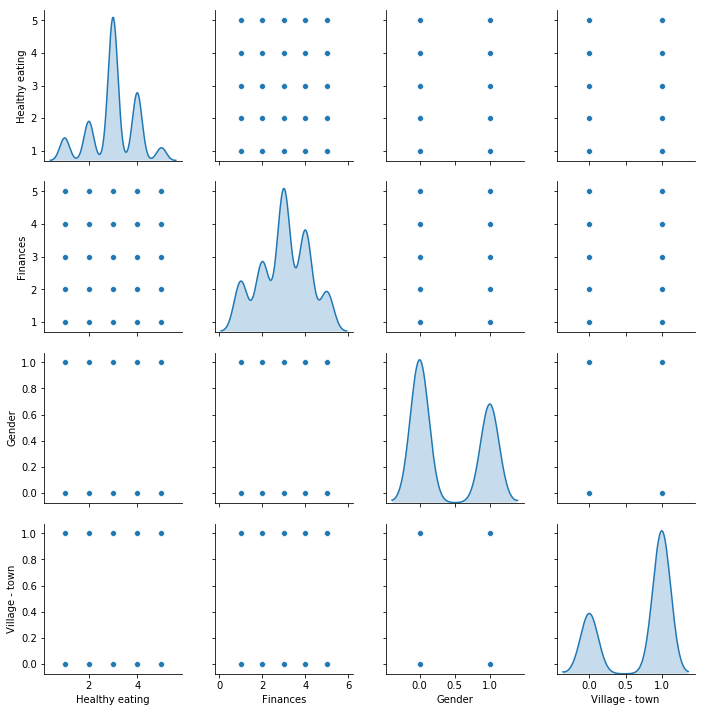

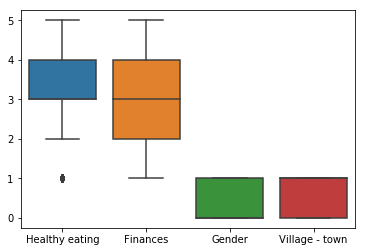

In [369]:
# Check for missing value
print("Missing values in dataframe\n",dfSurvey.isnull().sum())
# since missing values are limited to a small number of observations, its better to eliminate those
dfSurvey.dropna(inplace=True)

# Replacing gender values with o for female and 1 for male
dfSurvey.Gender[dfSurvey.Gender == 'female'] = 0
dfSurvey.Gender[dfSurvey.Gender == 'male'] = 1
dfSurvey.Gender = dfSurvey.Gender.astype(int)
# Replacing gender values with o for village and 1 for city
dfSurvey['Village - town'].replace('village',0,inplace=True)
dfSurvey['Village - town'].replace('city',1,inplace=True)
dfSurvey['Village - town'] = dfSurvey['Village - town'].astype(int)

print("Encoded values \n",dfSurvey.head())

# Using pair plot to understand how data distributed accross feature
sns.pairplot(dfSurvey,diag_kind='kde')
plt.show()

# Lets find if there are any outlier
sns.boxplot(data = dfSurvey)
plt.show()

In [371]:
#Correlation matrix
#Pairwise correlations between variables
dfSurvey.corr()

,Healthy eating,Finances,Gender,Village - town
Healthy eating,1.000000,0.098858,-0.065039,0.028783
Finances,0.098858,1.000000,-0.063568,-0.083115
Gender,-0.065039,-0.063568,1.000000,-0.006752
Village - town,0.028783,-0.083115,-0.006752,1.000000


# Create Hypothesis on the following questions 
# Is saving money (finances) gender dependant?

Null hypothesis: Ho: Saving money(Finances) is gender dependant

Alternative hypothesis: 𝐻𝐴 : Saving money(Finances) is not gender dependant

In [372]:
# We use the chi-square test of independence to find out whether finances is dependant on gender
# Here we select α = 0.05

alpha = 0.05

chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(dfSurvey[["Finances","Gender"]].groupby("Gender").sum().reset_index())
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

if p_value > alpha:
    print('Accept null hypothesis')
else:
    print('Reject the null hypothesis')


# In this example, p value is 0.832 and it is more than 5% level of significance
# So the statistical decision is to accept the null hypothesis at 5% level of significance that finances is dependant on gender

Chi-square statistic 0.04450 P value 0.832921 Degrees of freedom 1
Accept null hypothesis


# Is there any differences in money saving (finances) between people from city or village?

In [373]:
# We use the t test one sample to find out any differences in money saving (finances) between people from city or village

#Null hypothesis: Ho: Saving money(Finances) is not different between people from city or village
#Alternative hypothesis: 𝐻𝐴 : Saving money(Finances) is significantly different between people from city or village

# Here we select α = 0.05
alpha = 0.05


print(dfSurvey.groupby("Village - town")['Finances'])

village = dfSurvey[(dfSurvey['Village - town'] == 0)].reset_index()
city = dfSurvey[(dfSurvey['Village - town'] == 1)].reset_index()

diff = city['Finances'] - village['Finances']
diff.dropna(inplace=True)

t_statistic, p_value  =  stats.ttest_1samp(diff,np.abs(diff.mean()))
print('P Value %1.3f' % p_value)

if p_value > alpha:
    print('Accept null hypothesis')
else:
    print('Reject the null hypothesis')
    
# In this example, p value is 0.027 and it is less than 5% level of significance
# So the statistical decision is to reject the null hypothesis at 5% level of significance that finances is different between people of village or city

P Value 0.027
Reject the null hypothesis


# Do Women have a Healthier Lifestyle than Men?

In [374]:
# We use the t test for independant samples to find out whether woman have a Healthier Lifestyle than Men

#Null hypothesis: Ho: Women have a Healthier Lifestyle than Men
#Alternative hypothesis: 𝐻𝐴 : Women do not have a Healthier Lifestyle than Men

# Here we select α = 0.05
alpha = 0.05


# Showing descriptive statistics from pandas.describe()
df1 = dfSurvey[["Gender","Healthy eating"]].groupby("Gender")
print(df1.describe())

female = dfSurvey[(dfSurvey['Gender'] == 0)]
male = dfSurvey[(dfSurvey['Gender'] == 1)]

t_statistic, p_value = stats.ttest_ind(female['Healthy eating'], male['Healthy eating'])
print('P Value %1.3f' % p_value)

if p_value > alpha:
    print('Accept null hypothesis')
else:
    print('Reject the null hypothesis')
    
# In this example, p value is 0.040 and it is less than 5% level of significance
# So the statistical decision is to reject the null hypothesis at 5% level of significance that woman have a Healthier Lifestyle than Men

       Healthy eating                                             
                count      mean       std  min  25%  50%  75%  max
Gender                                                            
0               588.0  3.081633  0.851976  1.0  3.0  3.0  4.0  5.0
1               406.0  2.958128  1.037909  1.0  2.0  3.0  4.0  5.0
P Value 0.040
Reject the null hypothesis


# Are Village People Healthier than City People ?

In [375]:
# We use the t test for independant samples to find out if Village People Healthier than City People

#Null hypothesis: Ho: Village People are Healthier than City People
#Alternative hypothesis: 𝐻𝐴 : Village People are not Healthier than City People

# Here we select α = 0.05
alpha = 0.05

dfSurvey[["Village - town","Healthy eating"]].groupby("Village - town").sum().reset_index()

village = dfSurvey[(dfSurvey['Village - town'] == 0)]
village.reset_index(inplace= True)

city = dfSurvey[(dfSurvey['Village - town'] == 1)]
city.reset_index(inplace= True)

t_statistic, p_value = stats.ttest_ind(village['Healthy eating'], city['Healthy eating'])
print('P Value %1.3f' % p_value)

if p_value > alpha:
    print('Accept null hypothesis')
else:
    print('Reject the null hypothesis')
    
# In this example, p value is 0.365 and it is more than 5% level of significance
# So the statistical decision is to accept the null hypothesis at 5% level of significance that Village People Healthier than City People

P Value 0.365
Accept null hypothesis
